In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import subprocess
import os

In [6]:
def draw(latex):
    from PIL import Image

    tmpfilename = "circuit"
    latex_filename =  f"{tmpfilename}.tex"
    pdf_filename = f"{tmpfilename}.pdf"
    with open(latex_filename, "w") as latex_file:
        latex_file.write(latex)
    try:
        cmd = f"pdflatex {latex_filename}"
#        print(f"Running cmd {cmd}")
        res = subprocess.run(cmd, capture_output=True)
#        print(str(res.stdout))
    except OSError as exc:
        print("`pdflatex` command could not be run.")
        return None
    except subprocess.CalledProcessError as exc:
        print(
            "Unable to compile LaTeX. Perhaps you are missing the `qcircuit` package."
            " The output from the `pdflatex` command is in `latex_error.log`."
        )
        print(exc.stdout)
        return None
    try:
        subprocess.run(
            ["pdftocairo", "-singlefile", "-png", "-q", pdf_filename, tmpfilename],
            check=True,
        )
    except (OSError, subprocess.CalledProcessError) as exc:
        print("`pdftocairo` failed to produce an image.")
        print(res.stdout.decode("utf-8"))
        return None
    os.remove(pdf_filename)
    image = Image.open(tmpfilename + ".png")
#        image = utils._trim(image)
    return image

# Bell pair generation

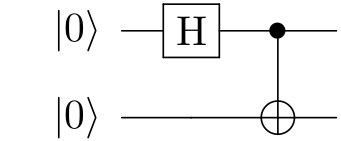

In [27]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \nghost{1} & \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

In [4]:
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));
circuit.draw(output="latex_source")

'\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'

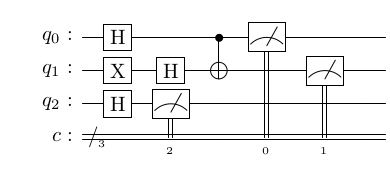

In [8]:
s = '\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'
draw(s)

In [57]:
latex = r"""\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}"""

draw(latex)

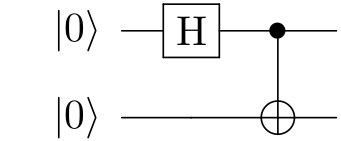

In [26]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \nghost{1} & \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

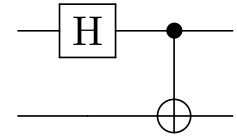

In [28]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

In [21]:
cmd = f"pdflatex circuit.tex"
print(f"Running cmd {cmd}")
res = subprocess.run(cmd, capture_output=True)
print(res.stdout)

Running cmd pdflatex circuit.tex
b'This is pdfTeX, Version 3.14159265-2.6-1.40.19 (MiKTeX 2.9.6840)\r\nentering extended mode\r\n(circuit.tex\r\nLaTeX2e <2018-04-01> patch level 5\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\latex\\standalone\\standalone.cls"\r\nDocument Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan\r\ndalone\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\latex\\tools\\shellesc.sty")\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\generic\\iftex\\ifluatex.sty"\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\generic\\iftex\\iftex.sty"))\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\latex\\xkeyval\\xkeyval.sty"\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\generic\\xkeyval\\xkeyval.tex"\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\generic\\xkeyval\\xkvutils.tex"\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\generic\\xkeyval\\keyval.tex"))))\r\n("C:\\Program Files (x86)\\MiKTeX 2.9\\tex\\latex\\standalone\\standalone.cfg")\r\n("C:\\Program Fi